### Week7-3. PDE to ODE: Scipy를 이용하여 RK45 도입

[423.         409.24779401 395.8606745  382.56465036 370.31100936
 358.2007227  347.66490181 337.26194928 328.76330967 320.32348288
 313.90336352 307.42494814 302.89506793 298.17882005 295.20650932
 291.93997487 290.1398247  287.97841008 286.98608292 285.61252059
 285.12901306 284.28522975 284.09213788 283.5873699  283.541316
 283.24503088 283.26146829 283.08971403 283.12444862 283.0257286
 283.05907902 283.0028266  283.028228   282.99666795 283.01352817
 282.99648861 283.00624014 282.99809476 283.00227884 283.00027641
 282.99974818]


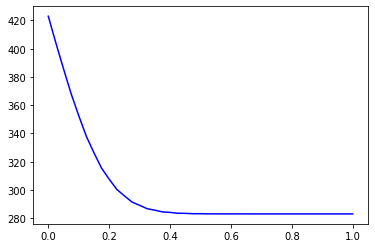

Nt_RK45: 2316


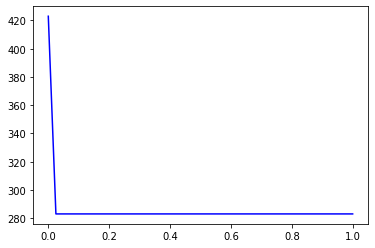

# time steps: 2316


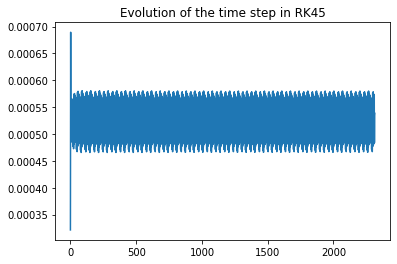

In [59]:
"""Temperature evolution in a rod, computed by explicit odespy solvers."""

from numpy import linspace, zeros, linspace, array
import matplotlib.pyplot as plt
import time
import numpy as np



def rhs(t, u):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 f(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + f(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 423

def dsdt(t):
    return 0

def f(x, t):
    return 0


L = 1
beta = 1
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta)

dt *= 100

from math import e
from scipy import integrate as inte
import matplotlib.pyplot as plt


T = 1.2
solution = inte.RK45(rhs, 0, U_0, T, 0.001,atol=1e-5) #vectorized=True)
y_values = []
time_points = []
for i in range(10000):
# get solution step state
    solution.step() #implemented function in scipy to collect data
    time_points.append(solution.t)
    for j in range(N+1):
        y_values.append(solution.y[j])
    # break loop after modeling is finished
    if solution.status == 'finished':
        break
#print (y_values1)   

u_value = np.reshape(y_values,(len(time_points),N+1))
new_value = np.zeros(N+1)
for i in range(N+1):
    new_value[i] = u_value[20][i]
    
print (u_value[39])
plt.plot(x, new_value, 'b-')
plt.show()
print ("Nt_RK45:", len(time_points))
plt.plot(x, U_0, 'b-')
plt.show()



if hasattr(solution, 't'):
    print ('# time steps:', len(time_points))
    plt.figure()
    plt.plot(array(time_points[1:]) - array(time_points[:-1]))
    plt.title('Evolution of the time step in %s' % solution.__class__.__name__)
    plt.savefig('tmp.png'); plt.savefig('tmp.pdf')
    plt.show()
else:
    print ('# time steps:', len(time_points))